In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data.csv")

# Extract possible franchises from titles
franchise_counts = Counter()

for title in df['title'].dropna():
    words = re.findall(r'\b[A-Za-z0-9]+\b', title)  # Extract words
    processed_words = set()  # Track words already processed in this title
    for word in words:
        if len(word) > 2 and word not in processed_words:  # Ignore short words and duplicates within the same title
            franchise_counts[word] += 1
            processed_words.add(word)

# Filter out common franchises (appearing in at least 3 titles)
common_franchises = {k: v for k, v in franchise_counts.items() if v > 2}

# Sort and display top 20 franchises
common_franchises_sorted = sorted(common_franchises.items(), key=lambda x: x[1], reverse=True)
print(common_franchises_sorted[:20])



[('Mario', 141), ('The', 82), ('Super', 81), ('Pokemon', 79), ('Fire', 71), ('Emblem', 70), ('Pack', 47), ('the', 46), ('Bros', 45), ('Legend', 43), ('Zelda', 43), ('Awakening', 36), ('New', 33), ('Kirby', 31), ('Donkey', 29), ('Kong', 29), ('Nintendo', 27), ('Wii', 26), ('Art', 24), ('Smash', 23)]


In [2]:
df

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario 3D World + Bowser's Fury,Switch,"Feb 12, 2021",NaN,/game/switch/super-mario-3d-world-+-bowsers-fury,NaN,['Nintendo'],"['Action', 'Platformer', '3D']"
1,NaN,Super Smash Bros. Ultimate: Sephiroth,Switch,"Dec 22, 2020",NaN,/game/switch/super-smash-bros-ultimate-sephiroth,NaN,['Nintendo'],"['Action', '2D', 'Fighting']"
2,66.0,Fitness Boxing 2: Rhythm & Exercise,Switch,"Dec 4, 2020",6.2,/game/switch/fitness-boxing-2-rhythm-exercise,E,"['Nintendo', ' Imagineer Co.', 'Ltd.']","['Miscellaneous', 'Exercise / Fitness']"
3,63.0,Fire Emblem: Shadow Dragon & the Blade of Light,Switch,"Dec 4, 2020",7.6,/game/switch/fire-emblem-shadow-dragon-the-bla...,E,['Intelligent Systems'],"['Strategy', 'Turn-Based', 'Tactics']"
4,79.0,Hyrule Warriors: Age of Calamity,Switch,"Nov 20, 2020",8.1,/game/switch/hyrule-warriors-age-of-calamity,T,"['Omega Force', ' Koei Tecmo Games']","['Action', ""Beat-'Em-Up"", '3D']"
...,...,...,...,...,...,...,...,...,...
1021,NaN,Bayonetta 3,Switch,TBA,NaN,/game/switch/bayonetta-3,NaN,['PlatinumGames'],"['Action Adventure', 'Linear']"
1022,NaN,The Legend of Zelda: Breath of the Wild Sequel,Switch,TBA,NaN,/game/switch/the-legend-of-zelda-breath-of-the...,NaN,['Nintendo'],"['Action Adventure', 'Open-World']"
1023,NaN,Yo-kai Watch 4,Switch,TBA,NaN,/game/switch/yo-kai-watch-4,E10+,['Level 5'],"['Role-Playing', 'Trainer']"
1024,NaN,Pokemon Sleep,iOS,TBA,NaN,/game/ios/pokemon-sleep,NaN,"['The Pokemon Company', ' Select Button']","['Role-Playing', 'Miscellaneous', 'Application..."


In [3]:
df = df.dropna()
df

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
2,66.0,Fitness Boxing 2: Rhythm & Exercise,Switch,"Dec 4, 2020",6.2,/game/switch/fitness-boxing-2-rhythm-exercise,E,"['Nintendo', ' Imagineer Co.', 'Ltd.']","['Miscellaneous', 'Exercise / Fitness']"
3,63.0,Fire Emblem: Shadow Dragon & the Blade of Light,Switch,"Dec 4, 2020",7.6,/game/switch/fire-emblem-shadow-dragon-the-bla...,E,['Intelligent Systems'],"['Strategy', 'Turn-Based', 'Tactics']"
4,79.0,Hyrule Warriors: Age of Calamity,Switch,"Nov 20, 2020",8.1,/game/switch/hyrule-warriors-age-of-calamity,T,"['Omega Force', ' Koei Tecmo Games']","['Action', ""Beat-'Em-Up"", '3D']"
7,85.0,Pikmin 3 Deluxe,Switch,"Oct 30, 2020",8.4,/game/switch/pikmin-3-deluxe,E10+,"['Eighting', ' Nintendo']","['Strategy', 'Real-Time', 'General']"
8,79.0,Part Time UFO,Switch,"Oct 28, 2020",7.3,/game/switch/part-time-ufo,E10+,['HAL Labs'],"['Action', 'Arcade']"
...,...,...,...,...,...,...,...,...,...
998,90.0,Blast Corps,N64,"Feb 28, 1997",8.4,/game/nintendo-64/blast-corps,E,['Rare Ltd.'],"['Action', 'General']"
999,83.0,Mario Kart 64,N64,"Feb 10, 1997",8.6,/game/nintendo-64/mario-kart-64,E,['Nintendo'],"['Driving', 'Racing', 'Kart']"
1000,92.0,Wave Race 64,N64,"Nov 1, 1996",8.3,/game/nintendo-64/wave-race-64,E,['Nintendo'],"['Driving', 'Racing', 'Snow / Water']"
1001,80.0,Pilotwings 64,N64,"Sep 29, 1996",8.0,/game/nintendo-64/pilotwings-64,E,['Paradigm Entertainment'],"['Simulation', 'General']"


In [22]:
#pip install requests beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [23]:
import requests
from bs4 import BeautifulSoup


In [36]:
import requests
from bs4 import BeautifulSoup


all_data = []

for i in range(1,25):
    url = f"https://www.vgchartz.com/games/games.php?page={i}&console=3DS&order=Sales&ownership=Both&direction=DESC&showpublisher=1&showreleasedate=1&showlastupdate=1&showvgchartzscore=1&showcriticscore=1&showuserscore=1&showshipped=1"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")
    table_rows = soup.find_all("tr")[3:]  # Skip the header rows

    # Break if no rows are found (i.e., no more pages)
    if not table_rows:
        break

    for row in table_rows:
        columns = row.find_all("td")
        if len(columns) > 9:  # Ensure it has enough columns
            game_name = columns[2].text.strip()
            shipped = columns[8].text.strip()
            all_data.append((game_name, shipped))

    print(f"Page {i} scraped.")


# Run the function and print the results
for game, shipped in all_data:
    print(f"{game}: {shipped}")


Page 1 scraped.
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Page 7 scraped.
Page 8 scraped.
Page 9 scraped.
Page 10 scraped.
Page 11 scraped.
Page 12 scraped.
Page 13 scraped.
Page 14 scraped.
Page 15 scraped.
Page 16 scraped.
Page 17 scraped.
Page 18 scraped.
Page 19 scraped.
Page 20 scraped.
Page 21 scraped.
Page 22 scraped.
Page 23 scraped.
Page 24 scraped.
: 
Mario Kart 7    Read the review: 18.99m
Pokémon X/Y    Read the review: 16.76m
Pokémon Sun/Moon: 16.33m
Pokémon Omega Ruby/Pokémon Alpha Sapphire: 14.63m
New Super Mario Bros. 2    Read the review: 13.42m
Animal Crossing: New Leaf    Read the review: 13.06m
Super Mario 3D Land    Read the review: 12.88m
Super Smash Bros. for 3DS    Read the review: 9.65m
Pokémon: Ultra Sun and Ultra Moon: 9.23m
Yokai Watch 2: Bony Spirits / Fleshy Souls / Psychic Specters: 7.30m
Tomodachi Life: 6.72m
Luigi's Mansion: Dark Moon    Read the review: 6.48m
The Legend of Zelda: Ocarina of Time 3D    Read the revi

In [44]:
# Convert the list to a DataFrame
df_shipped_amt = pd.DataFrame(all_data, columns=['Title', 'Shipped'])

# Remove rows with 'N/A' in the 'Shipped' column
df_shipped_amt = df_shipped_amt[df_shipped_amt['Shipped'] != 'N/A']



In [47]:
df_shipped_amt

,Title,Shipped
0,,
1,Mario Kart 7 Read the review,18.99m
2,Pokémon X/Y Read the review,16.76m
3,Pokémon Sun/Moon,16.33m
4,Pokémon Omega Ruby/Pokémon Alpha Sapphire,14.63m
...,...,...
969,,
1020,,
1071,,
1122,,


In [4]:
import pandas as pd
import re
from collections import Counter

# Load dataset

# Extract possible franchises from titles
franchise_counts = Counter()

for title in df['title'].dropna():
    words = re.findall(r'\b[A-Za-z0-9]+\b', title)  # Extract words
    processed_words = set()  # Track words already processed in this title
    for word in words:
        if len(word) > 2 and word not in processed_words:  # Ignore short words and duplicates within the same title
            franchise_counts[word] += 1
            processed_words.add(word)

# Filter out common franchises (appearing in at least 3 titles)
common_franchises = {k: v for k, v in franchise_counts.items() if v > 2}

# Sort and display top 20 franchises
common_franchises_sorted = sorted(common_franchises.items(), key=lambda x: x[1], reverse=True)
print(common_franchises_sorted[:20])



[('Mario', 101), ('Pokemon', 60), ('The', 47), ('Super', 40), ('the', 28), ('Legend', 28), ('Zelda', 28), ('Kirby', 21), ('Donkey', 21), ('Kong', 21), ('Party', 18), ('Fire', 16), ('Emblem', 16), ('Wii', 16), ('New', 15), ('Advance', 15), ('World', 14), ('Bros', 14), ('Luigi', 13), ('Art', 13)]


In [5]:
# Filter out common franchises (appearing in at least 3 titles)
rare_franchises = {k: v for k, v in franchise_counts.items() if v < 2}

# Sort and display top 20 franchises
rare_franchises_sorted = sorted(rare_franchises.items(), key=lambda x: x[1], reverse=True)
print(rare_franchises_sorted)
len(rare_franchises_sorted)

[('Exercise', 1), ('Blade', 1), ('Light', 1), ('Calamity', 1), ('Part', 1), ('UFO', 1), ('Live', 1), ('Origami', 1), ('Cafe', 1), ('Isle', 1), ('Armor', 1), ('Worldwide', 1), ('Good', 1), ('Job', 1), ('Horizons', 1), ('Side', 1), ('Cindered', 1), ('Encore', 1), ('Stretchers', 1), ('Ring', 1), ('Town', 1), ('Hero', 1), ('Elusive', 1), ('Daemon', 1), ('Machina', 1), ('Astral', 1), ('Chain', 1), ('Marvel', 1), ('Alliance', 1), ('Order', 1), ('Cadence', 1), ('Crypt', 1), ('NecroDancer', 1), ('Featuring', 1), ('BoxBoy', 1), ('BoxGirl', 1), ('Crafted', 1), ('Extra', 1), ('Travis', 1), ('Strikes', 1), ('Eevee', 1), ('Ends', 1), ('with', 1), ('Dragalia', 1), ('Torna', 1), ('Vehicle', 1), ('Cat', 1), ('Dog', 1), ('Gold', 1), ('Vacation', 1), ('Octopath', 1), ('Traveler', 1), ('Aces', 1), ('Archives', 1), ('Octo', 1), ('Expansion', 1), ('Sushi', 1), ('Striker', 1), ('Way', 1), ('Sushido', 1), ('Dead', 1), ('Heat', 1), ('Breakers', 1), ('Variety', 1), ('Robot', 1), ('Detective', 1), ('Allies', 1)

447

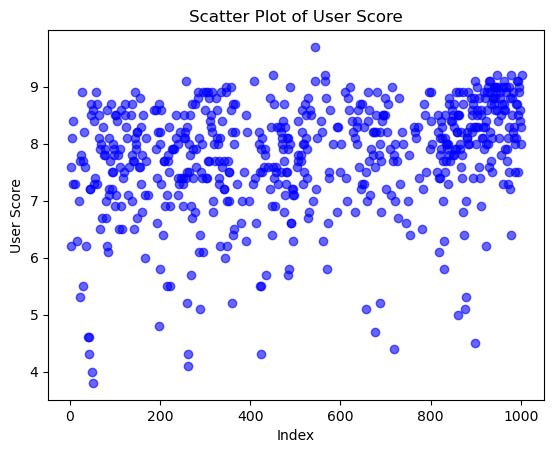

In [6]:
plt.scatter(df.index, df['user_score'], color='blue', alpha=0.6)
plt.xlabel("Index")
plt.ylabel("User Score")
plt.title("Scatter Plot of User Score")
plt.show()

In [7]:
import pandas as pd
import re
from collections import Counter

# Load dataset
df = pd.read_csv("data.csv")
df = df.dropna().reset_index(drop=True)
# Step 1: Extract potential franchises from titles
franchise_counts = Counter()

for title in df['title'].dropna():
    words = re.findall(r'\b[A-Za-z0-9]+\b', title)  # Extract words
    for word in words:
        if len(word) > 2:  # Ignore short words
            franchise_counts[word] += 1

# Step 2: Define franchise words (appearing in at least 3 titles)
franchise_words = {k for k, v in franchise_counts.items() if v > 2}

# Step 3: Create a 'franchise' column
def is_franchise(title):
    if pd.isna(title):
        return Falseafnbu
    words = re.findall(r'\b[A-Za-z0-9]+\b', title)
    return any(word in franchise_words for word in words)

df['franchise'] = df['title'].apply(is_franchise)

# Step 4: Save updated dataset
df.to_csv("data_with_franchise.csv", index=False)




In [8]:
import ast

df['genres'] = df['genres'].apply(ast.literal_eval)  # Convert string list to actual list


In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genres'])

# Convert to DataFrame and add back to original dataset
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
df = pd.concat([df, genre_df], axis=1).drop(columns=['genres'])  
df = pd.concat([df, genre_df], axis=1).drop(columns=['developers']) 
df = pd.concat([df, genre_df], axis=1).drop(columns=['link'])  
df = pd.concat([df, genre_df], axis=1).drop(columns=['date'])  
df = pd.concat([df, genre_df], axis=1).drop(columns=['platform'])  


# Without Parameter Tuning

In [10]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Load dataset

# Step 1: Remove NaN or blank values
df = df.dropna().replace(r'^\s*$', np.nan, regex=True).dropna()

# Step 2: Prepare Features and Target Variable
X = df.drop(columns=['title', 'franchise'])  # Drop non-numeric columns
y = df['franchise'].astype(int)  # Convert franchise column to binary (0/1)

# Convert categorical variables (if any) to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 3: Stratified Split to Ensure Balanced Data
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(sss.split(X, y))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Step 4: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 5: Train Neural Network Model (MLP)
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=0)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Step 6: Display Model Performance
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf, target_names=['Not Franchise', 'Franchise']))
rf_accuracy = accuracy_score(y_test, y_pred_rf) * 100
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")

print("\nNeural Network Model Performance:")
print(classification_report(y_test, y_pred_nn, target_names=['Not Franchise', 'Franchise']))
nn_accuracy = accuracy_score(y_test, y_pred_nn) * 100
print(f"Neural Network Accuracy: {nn_accuracy:.2f}%")


Random Forest Model Performance:
               precision    recall  f1-score   support

Not Franchise       0.18      0.11      0.14        18
    Franchise       0.85      0.91      0.88       103

     accuracy                           0.79       121
    macro avg       0.52      0.51      0.51       121
 weighted avg       0.75      0.79      0.77       121

Random Forest Accuracy: 79.34%

Neural Network Model Performance:
               precision    recall  f1-score   support

Not Franchise       0.38      0.33      0.35        18
    Franchise       0.89      0.90      0.89       103

     accuracy                           0.82       121
    macro avg       0.63      0.62      0.62       121
 weighted avg       0.81      0.82      0.81       121

Neural Network Accuracy: 81.82%


# With Parameter Tuning

In [12]:
import re
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Load dataset

# Step 1: Remove NaN or blank values
df = df.dropna().replace(r'^\s*$', np.nan, regex=True).dropna()

# Step 2: Prepare Features and Target Variable
X = df.drop(columns=['title', 'franchise'])  # Drop non-numeric columns
y = df['franchise'].astype(int)  # Convert franchise column to binary (0/1)

# Convert categorical variables (if any) to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 3: Stratified Split to Ensure Balanced Data
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(sss.split(X, y))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

import pandas as pd
import numpy as np

# Step 4: Train Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=50,       # Best number of trees
    random_state=0,      # For reproducibility
    bootstrap=False,      # No bootstrapping
    max_depth=20,         # Maximum depth of the tree
    min_samples_leaf=1,   # Minimum number of samples per leaf node
    min_samples_split=10  # Minimum number of samples to split a node
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)




In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                              param_grid=param_grid_rf,
                              cv=5,  # 5-fold cross-validation
                              n_jobs=-1,  # Use all processors
                              verbose=2)
                              
# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters for RF:", grid_search_rf.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for RF: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [14]:
param_grid_nn = {
    'hidden_layer_sizes': [(32,), (64, 32), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],  # Regularization
    'learning_rate': ['constant', 'adaptive']
}

# Grid Search for Neural Network
grid_search_nn = GridSearchCV(estimator=MLPClassifier(max_iter=300, random_state=0),
                              param_grid=param_grid_nn,
                              cv=5,
                              n_jobs=-1,
                              verbose=2)

# Fit the model
grid_search_nn.fit(X_train, y_train)

# Best parameters
print("Best Parameters for NN:", grid_search_nn.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for NN: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (32,), 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
df.to_csv("check.csv")

In [16]:
import pandas as pd
import numpy as np

# Step 4: Train Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=50,       # Best number of trees
    random_state=0,      # For reproducibility
    bootstrap=True,      # No bootstrapping
    max_depth=30,         # Maximum depth of the tree
    min_samples_leaf=2,   # Minimum number of samples per leaf node
    min_samples_split=2)  # Minimum number of samples to split a node
    
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)




In [17]:
# Step 5: Train Neural Network Model (MLP) with tuned parameters
nn_model = MLPClassifier(
    activation='relu',          # Activation function
    alpha=0.0001,               # L2 regularization parameter
    hidden_layer_sizes=(32,),   # Number of neurons in each hidden layer
    learning_rate='constant',   # Learning rate schedule
    solver='sgd',               # Stochastic gradient descent optimizer
    max_iter=200,               # Maximum number of iterations
    random_state=0             # For reproducibility
)

nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)


In [18]:
from sklearn.metrics import accuracy_score, classification_report

# Step 6: Display Model Performance
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf, target_names=['Not Franchise', 'Franchise']))
rf_accuracy = accuracy_score(y_test, y_pred_rf) * 100
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")

print("\nNeural Network Model Performance:")
print(classification_report(y_test, y_pred_nn, target_names=['Not Franchise', 'Franchise']))
nn_accuracy = accuracy_score(y_test, y_pred_nn) * 100
print(f"Neural Network Accuracy: {nn_accuracy:.2f}%")


Random Forest Model Performance:
               precision    recall  f1-score   support

Not Franchise       0.50      0.06      0.10        18
    Franchise       0.86      0.99      0.92       103

     accuracy                           0.85       121
    macro avg       0.68      0.52      0.51       121
 weighted avg       0.80      0.85      0.80       121

Random Forest Accuracy: 85.12%

Neural Network Model Performance:
               precision    recall  f1-score   support

Not Franchise       0.00      0.00      0.00        18
    Franchise       0.85      1.00      0.92       103

     accuracy                           0.85       121
    macro avg       0.43      0.50      0.46       121
 weighted avg       0.72      0.85      0.78       121

Neural Network Accuracy: 85.12%


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Predicting Test Set

In [19]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("data_with_franchise.csv")

# Step 1: Remove NaN or blank values
df = df.dropna().replace(r'^\s*$', np.nan, regex=True).dropna()

# Step 2: Prepare Features and Target Variable
X = df.drop(columns=['title', 'franchise'])  # Drop non-numeric columns
y = df['franchise'].astype(int)  # Convert franchise column to binary (0/1)

# Convert categorical variables (if any) to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 3: Stratified Split to Ensure Balanced Data
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(sss.split(X, y))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Step 4: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 5: Train Neural Network Model (MLP)
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

# Step 6: Save Prediction Results
results_df = df.iloc[test_idx].copy()  # Get corresponding test rows
results_df['Actual Franchise'] = y_test.values
results_df['Random Forest Prediction'] = y_pred_rf
results_df['Neural Network Prediction'] = y_pred_nn

# Save results to CSV
results_df.to_csv("prediction_results.csv", index=False)

# Print first few rows of predictions
print(results_df[['title', 'Actual Franchise', 'Random Forest Prediction', 'Neural Network Prediction']].head())


                                    title  Actual Franchise  \
49                        Luigi's Mansion                 1   
414                         Mario Party 8                 1   
54   Yo-kai Watch Blasters: Red Cat Corps                 1   
594                         Yoshi's Story                 1   
553                        Metroid Fusion                 1   

     Random Forest Prediction  Neural Network Prediction  
49                          1                          1  
414                         1                          1  
54                          1                          1  
594                         1                          1  
553                         1                          1  


In [20]:

# Save results to CSV
results_df.to_csv("prediction_results(with dropped columns).csv", index=False)

In [21]:
results_df

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres,franchise,Actual Franchise,Random Forest Prediction,Neural Network Prediction
49,74.0,Luigi's Mansion,3DS,"Oct 12, 2018",8.1,/game/3ds/luigis-mansion,E,"['Nintendo', ' GREZZO']","['Action Adventure', 'General']",True,1,1,1
414,62.0,Mario Party 8,WII,"May 29, 2007",6.4,/game/wii/mario-party-8,E,['Hudson'],"['Miscellaneous', 'Party', 'Party', 'Party / M...",True,1,1,1
54,67.0,Yo-kai Watch Blasters: Red Cat Corps,3DS,"Sep 7, 2018",7.5,/game/3ds/yo-kai-watch-blasters-red-cat-corps,E10+,['Level 5'],"['Action', ""Beat-'Em-Up"", '3D']",True,1,1,1
594,65.0,Yoshi's Story,N64,"Mar 1, 1998",7.5,/game/nintendo-64/yoshis-story,E,['Nintendo'],"['Action', 'Platformer', '2D']",True,1,1,1
553,92.0,Metroid Fusion,GBA,"Nov 17, 2002",9.0,/game/game-boy-advance/metroid-fusion,E,['Nintendo'],"['Action Adventure', 'Sci-Fi']",True,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,62.0,Metal Torrent,DS,"May 24, 2010",9.7,/game/ds/metal-torrent,E,['Arika'],"['Action', 'Shooter', 'Shooter', 'Scrolling', ...",False,0,1,1
453,74.0,Pokemon Trozei!,DS,"Mar 6, 2006",7.3,/game/ds/pokemon-trozei!,E,['Genius Sonority Inc.'],"['Miscellaneous', 'Puzzle', 'Puzzle', 'Puzzle'...",True,1,1,1
24,64.0,Little Town Hero,Switch,"Oct 16, 2019",4.0,/game/switch/little-town-hero,E10+,['Game Freak'],"['Role-Playing', 'Japanese-Style']",False,0,1,1
15,75.0,Fire Emblem: Three Houses - Side Story: Cinder...,Switch,"Feb 13, 2020",7.6,/game/switch/fire-emblem-three-houses---side-s...,T,['Intelligent Systems'],"['Strategy', 'Turn-Based', 'Tactics']",True,1,1,1


# With Bootstrapping